# Trabajo Final: Predicción tiempo de retraso en vuelos de avión en la industria Estadounidense

Integrantes:

Ana María Pino

Andrés Felipe Arboleda

Carmen Elisa Grajales 

David Palacio

Diana Acosta

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
#Leemos la base que contiene los vuelos retrasados en 2015 en aeropuertos de Estados Unidos
flight = pd.read_csv('flights.csv', 
                     dtype={'YEAR': 'int', 
                           'MONTH': 'int',
                            'DAY': 'int',
                            'DAY_OF_WEEK': 'int',
                            'FLIGHT_NUMBER': 'int',
                            'SCHEDULED_DEPARTURE': 'int',
                            'AIRLINE': 'str',
                            'ORIGIN_AIRPORT': 'str',
                            'DESTINATION_AIRPORT': 'str'                    
                           })

In [3]:
#Visualizamos la base para reconocer las columnas que la componen
flight.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Conocemos la información inicial de las variables
flight.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [5]:
#Revisamos el comportamiento de datos Nulos que hay en la base
flight.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [4]:
#Hay columnas que no son utiles ni necesarias para el propósto que tenemos con el Dataset 
#Hay columnas en la base inicial que superan hasta el 80% de datos nulos 
#Se eliminan las columnas del Dataframe inicial
flight=flight.drop(['YEAR','FLIGHT_NUMBER','TAIL_NUMBER','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis=1)

In [7]:
#Revisamos nuevamente que las variables no tengan más del 80% de los datos Nulos
flight.isnull().sum()/len(flight)*100

MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         1.480526
DEPARTURE_DELAY        1.480526
TAXI_OUT               1.530259
WHEELS_OFF             1.530259
SCHEDULED_TIME         0.000103
ELAPSED_TIME           1.805629
AIR_TIME               1.805629
DISTANCE               0.000000
WHEELS_ON              1.589822
TAXI_IN                1.589822
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           1.589822
ARRIVAL_DELAY          1.805629
DIVERTED               0.000000
CANCELLED              0.000000
dtype: float64

In [5]:
# Eliminamos las filas donde al menos un dato sea nulo
flight = flight.dropna() 

In [9]:
#Verificamos que ya no se presenten datos nulos
flight.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [6]:
#Eliminación del Target para el análisis de la correlación
arrival_delay=flight['ARRIVAL_DELAY']
flight = flight.drop(['ARRIVAL_DELAY'],
                     axis=1
                    )

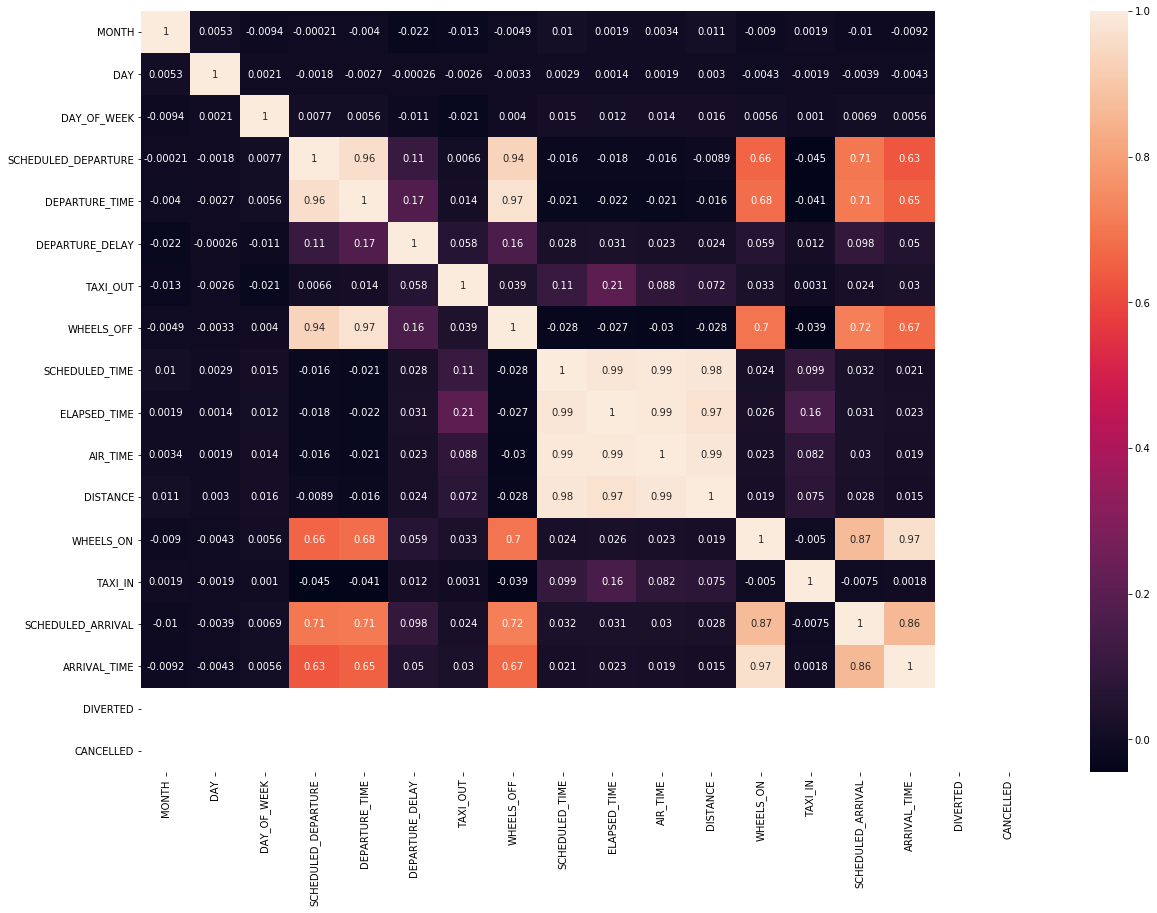

In [11]:
#Construimos un gráfico de correlación para identificar variables con una relación fuerte entre ellas
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [7]:
#Con la información del gráfico de correlación se eliminan variables que tienen correlaciones fuertes
flight = flight.drop(
    ['WHEELS_OFF', 'SCHEDULED_DEPARTURE', 'WHEELS_ON', 'SCHEDULED_TIME', 
     'ELAPSED_TIME', 'AIR_TIME','ARRIVAL_TIME', 'DEPARTURE_TIME'], 
    axis=1)

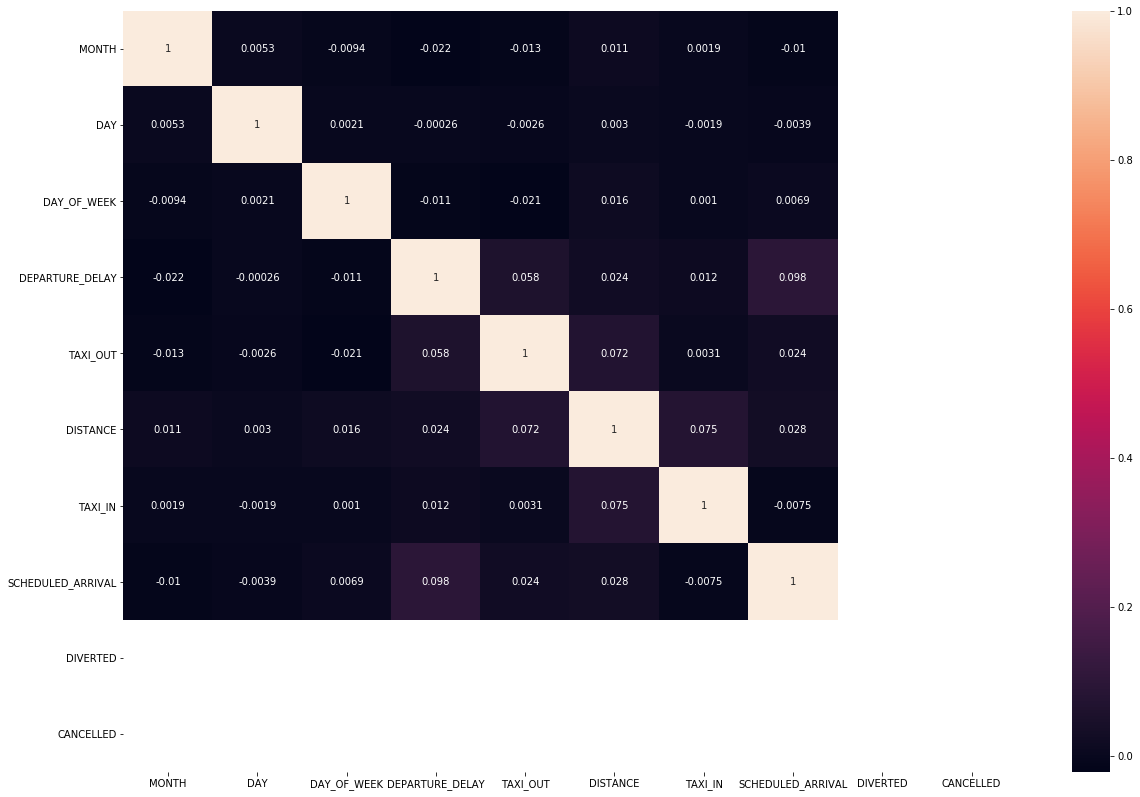

In [13]:
#Construimos un nuevo gráfico de correlación con las características restantes
axis = plt.subplots(figsize=(20, 14))
sns.heatmap(flight.corr(), annot = True)
plt.show()

In [8]:
## Realizamos la codificacion de variables categoricas
vbls_encode = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
encoder = LabelEncoder()

flight_encoder = flight.copy()

flight_category = flight[vbls_encode].apply(encoder.fit_transform)

flight_encoder = flight_encoder.drop(vbls_encode, axis=1).join(flight_category)
flight_encoder.head()

,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,1,4,-11.0,21.0,1448,4.0,430,0,0,1,323,584
1,1,1,4,-8.0,12.0,2330,4.0,750,0,0,0,482,542
2,1,1,4,-2.0,16.0,2296,11.0,806,0,0,11,584,373
3,1,1,4,-5.0,15.0,2342,8.0,805,0,0,0,482,510
4,1,1,4,-1.0,11.0,1448,5.0,320,0,0,1,583,324


In [9]:
#Separación de variables categóricas que no se estandarizan
flight_encoder_nostd = flight[['MONTH','DAY','DAY_OF_WEEK','DIVERTED','AIRLINE','CANCELLED','ORIGIN_AIRPORT','DESTINATION_AIRPORT']]
flight_encoder_nostd                        

,MONTH,DAY,DAY_OF_WEEK,DIVERTED,AIRLINE,CANCELLED,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,1,1,4,0,AS,0,ANC,SEA
1,1,1,4,0,AA,0,LAX,PBI
2,1,1,4,0,US,0,SFO,CLT
3,1,1,4,0,AA,0,LAX,MIA
4,1,1,4,0,AS,0,SEA,ANC
5,1,1,4,0,DL,0,SFO,MSP
6,1,1,4,0,NK,0,LAS,MSP
7,1,1,4,0,US,0,LAX,CLT
8,1,1,4,0,AA,0,SFO,DFW
9,1,1,4,0,DL,0,LAS,ATL


In [10]:
##Separación de las variables a estandarizar
flight_encoder_std= flight[['DEPARTURE_DELAY','TAXI_OUT','DISTANCE','TAXI_IN','SCHEDULED_ARRIVAL']]
flight_encoder_std

,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL
0,-11.0,21.0,1448,4.0,430
1,-8.0,12.0,2330,4.0,750
2,-2.0,16.0,2296,11.0,806
3,-5.0,15.0,2342,8.0,805
4,-1.0,11.0,1448,5.0,320
5,-5.0,18.0,1589,6.0,602
6,-6.0,11.0,1299,5.0,526
7,14.0,13.0,2125,8.0,803
8,-11.0,17.0,1464,3.0,545
9,3.0,12.0,1747,5.0,711


In [11]:
#Creamos el Scaler y estandarizamos los Datos númericos
scaler = StandardScaler()
scaler.fit(flight_encoder_std)
flight_std = scaler.transform(flight_encoder_std)
print(flight_std )

C:\Programs\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


[[-0.55014897  0.55553405  1.02444897 -0.61026756 -2.09742465]
 [-0.46882551 -0.45770013  2.47352924 -0.61026756 -1.46613777]
 [-0.30617857 -0.00737383  2.417669    0.6355166  -1.35566257]
 ...
 [-0.49593333  0.10520775  1.2708912   0.1016091  -2.07769694]
 [-0.41460986 -0.68286328  0.5989254  -0.78823673 -2.27497409]
 [ 0.15465441 -0.23253698  1.23474634 -0.4322984  -2.07769694]]


In [12]:
##LLevamos los datos estandarizados a un data frame
flight_std= pd.DataFrame(flight_std, columns=['DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE','TAXI_IN','SCHEDULED_ARRIVAL'])
flight_std

,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL
0,-0.550149,0.555534,1.024449,-0.610268,-2.097425
1,-0.468826,-0.457700,2.473529,-0.610268,-1.466138
2,-0.306179,-0.007374,2.417669,0.635517,-1.355663
3,-0.387502,-0.119955,2.493245,0.101609,-1.357635
4,-0.279071,-0.570282,1.024449,-0.432298,-2.314430
5,-0.387502,0.217789,1.256105,-0.254329,-1.758108
6,-0.414610,-0.570282,0.779650,-0.432298,-1.908039
7,0.127547,-0.345119,2.136725,0.101609,-1.361581
8,-0.550149,0.105208,1.050736,-0.788237,-1.870556
9,-0.170639,-0.457700,1.515690,-0.432298,-1.543076


In [13]:
##Aplicamos componentes princiáles a los datos numéricos estandarizados
pca = PCA(n_components=0.90)
pca_result = pca.fit_transform(flight_std)
pca_result


array([[-0.64676402,  1.35817448, -1.6914137 ,  0.09466702,  1.14000465],
       [-0.10296138,  1.68442754, -0.85166144, -1.18970749,  2.02014649],
       [ 0.52832724,  2.34066912, -0.43565868, -0.56695119,  1.38258153],
       ...,
       [-0.52759358,  1.86233317, -0.98525483,  0.13622619,  1.2097138 ],
       [-1.48787497,  0.99203093, -0.87579444,  0.12859737,  1.67698807],
       [-0.49229474,  1.24133539, -0.90275733,  0.22567386,  1.85933571]])

In [21]:
##Varianza explicada por cada una de las características
print(pca.explained_variance_ratio_)

[0.23272396 0.21166324 0.19622375 0.18384919 0.17553986]


In [14]:
#Construimos un pipe para graficar en los componentes principales algunas variables categóricas
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])
pc = pipe.fit_transform(flight_std)
print(pc)

[[-0.64676402  1.35817448]
 [-0.10296138  1.68442754]
 [ 0.52832724  2.34066912]
 ...
 [-0.52759358  1.86233317]
 [-1.48787497  0.99203093]
 [-0.49229474  1.24133539]]


In [23]:
#llevamos los componentes al dataframe
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2'])
flight_encoder_nostd['PC 1'] = pc_df ['PC 1']
flight_encoder_nostd['PC 2'] = pc_df ['PC 2']

C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


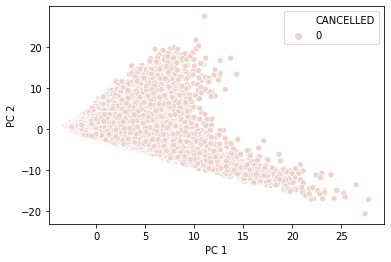

In [23]:
#Graficamos la variable cancelled 
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='CANCELLED')
plt.show()

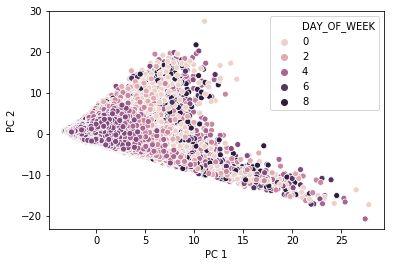

In [24]:
# Graficamos la variable day of week
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='DAY_OF_WEEK')
plt.show()

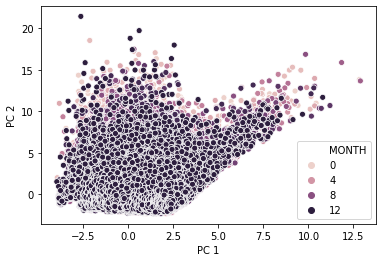

In [27]:
#Graficamos la variable month
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='MONTH')
plt.show()

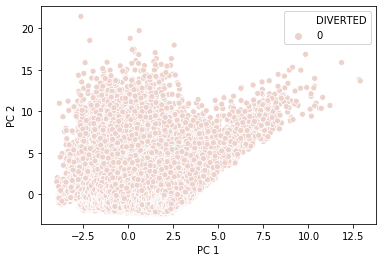

In [28]:
#Graficamos la variable diverted
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='DIVERTED')
plt.show()

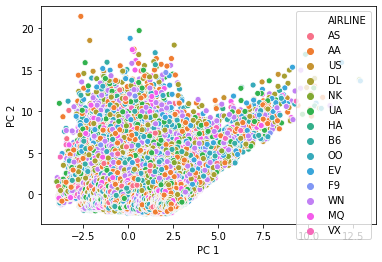

In [29]:
#Graficamos la variable aerolínea
sns.scatterplot(data=flight_encoder_nostd, 
                x='PC 1', y='PC 2', hue='AIRLINE')
plt.show()

In [15]:
##Se eliminan las variables sin variación y las estandarizadas
flight_encoder  = flight_encoder.drop(
    ['DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE','TAXI_IN','SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED'], 
    axis=1)


In [16]:
#Creamos un dataframe con las variables codificadas y las variables numéricas estandarizadas
flight_complete=pd.concat([flight_encoder.reset_index(drop=True), flight_std.reset_index(drop=True)], axis=1)
flight_complete.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL
0,1,1,4,1,323,584,-0.550149,0.555534,1.024449,-0.610268,-2.097425
1,1,1,4,0,482,542,-0.468826,-0.457700,2.473529,-0.610268,-1.466138
2,1,1,4,11,584,373,-0.306179,-0.007374,2.417669,0.635517,-1.355663
3,1,1,4,0,482,510,-0.387502,-0.119955,2.493245,0.101609,-1.357635
4,1,1,4,1,583,324,-0.279071,-0.570282,1.024449,-0.432298,-2.314430


In [17]:
#Validamos el tamaño del dataframe
flight_complete.shape

(5714008, 11)

In [18]:
#Particion de datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_set, test_set, train_set_target, test_set_target = train_test_split(flight_complete, arrival_delay, test_size=0.3, random_state=24)

In [19]:
#Validamos la dimensión de los datos de prueba
test_set.shape

(1714203, 11)

In [20]:
#Validamos la dimensión del test
test_set_target.shape

(1714203,)

In [21]:
#Creamos el random forest para el entrenamiento
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=1, n_jobs=-1)
forest_reg.fit(train_set,train_set_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
#Calculamos la precisión del modelo
r2 = forest_reg.score(test_set, test_set_target)
print('test set R2: ', r2)

test set R2:  0.8943361566120502


In [32]:
#Generamos la matriz de confusión de los datos de entrenamiento
from sklearn.metrics import confusion_matrix
confusion_matrix(train_set_target,(forest_reg.predict(train_set)).round())

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [33]:
#Generamos la matrix de confusión de los datos de prueba
confusion_matrix(test_set_target,(forest_reg.predict(test_set)).round())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

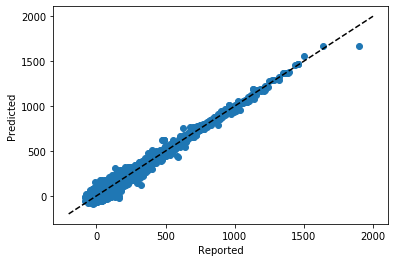

In [34]:
#graficamos la predicción
pred = forest_reg.predict(test_set)
plt.scatter(test_set_target, pred)
plt.plot([-200, 2000], [-200, 2000], 'k--')
plt.xlabel('Reported')
plt.ylabel('Predicted')
plt.show()

In [35]:
lista = []
for i in range(0, len(test_set_target)):
    lista.append(abs(test_set_target.iloc[i] - pred[i]))

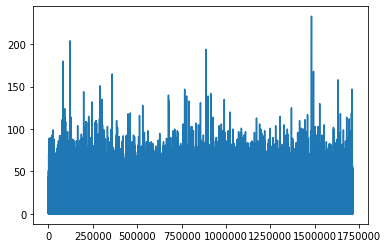

In [36]:
plt.plot(lista )

In [26]:
fr_model = RandomForestRegressor()

In [32]:
## Grid search con validación cruzada usando 3-fold para identificar los mejores hiperparametros del modelo 
# y garantizar un buen desempeño en las metricas de evaluación

from sklearn.model_selection import GridSearchCV

rf_params = {'bootstrap': [True, False],
             'max_depth': [80, 90, 100],
             'max_features': ['auto', 'sqrt'],
             'n_estimators': [50, 100, 200]}


rf_gs = GridSearchCV(estimator=fr_model, 
                      param_grid=rf_params, 
                      cv=3,
                      scoring='r2',
                      return_train_score=True)

rf_gs.fit(train_set,train_set_target)

print("Mejores parametros del modelo: ",rf_gs.best_params_)
print("R2:",rf_gs.best_score_)


C:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: could not allocate 234881024 bytes

In [ ]:
#Calculamos la precisión del modelo
fr_model = RandomForestRegressor()

accuracy = fr_model.score(test_set, test_set_target)
print('{0:.1%} test set accuracy'.format(accuracy))

#graficamos la predicción
pred = forest_reg.predict(test_set)
plt.scatter(test_set_target, pred)
plt.plot([-200, 2000], [-200, 2000], 'k--')
plt.xlabel('Reported')
plt.ylabel('Predicted')
plt.show()